# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ($k$-means, mean shift, spectral clustering and affinity propagation) on each one.  Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups. 

In [14]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, MeanShift, SpectralClustering, AffinityPropagation
from sklearn.cluster import estimate_bandwidth

%matplotlib inline

# Run four methods

    - 𝑘 -means
    - mean shift
    - spectral clustering
    - affinity propagation

# cluster centers that are not close
There are 4 cluster centers and clusters=3 for Spectral and KMeans.

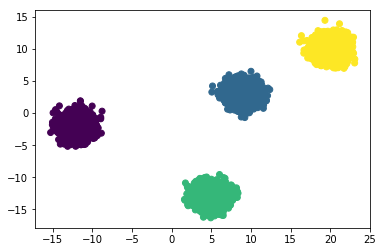

In [17]:
# The coordinates of the centers of our blobs.
centers = [[-12, -2], [9, 3],[5, -13],[20, 10]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)


plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

KMeans
col_0    0    1    2
row_0               
0        0  273    0
1      239    0    0
2        0    0  238
3      250    0    0 


MeanShift
col_0    0    1    2    3
row_0                    
0      273    0    0    0
1        0    0  239    0
2        0    0    0  238
3        0  250    0    0 


Spectral
col_0    0    1    2
row_0               
0        0  273    0
1        0    0  239
2        0  238    0
3      250    0    0 


Affinity
col_0  0    1    2    3    4    5    6    7    8    9   ...   279  280  281  \
row_0                                                   ...                   
0        0    0    0    0    0    9    0    7    0    0 ...     0    5    9   
1        1    1    1    1    1    0    1    0    1    1 ...     1    0    0   
2        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
3        0    0    0    0    0    0    0    0    0    0 ...     0    0    0   

col_0  282  283  284  285  286  287  288  
row_0                         

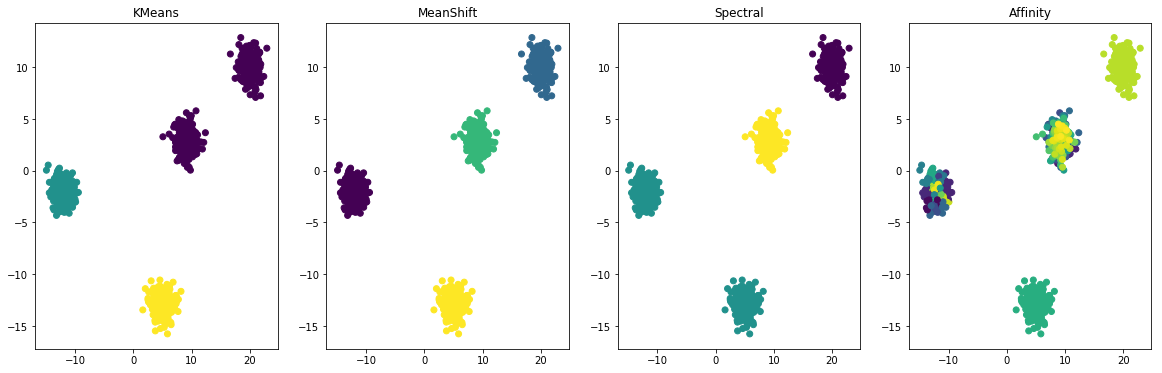

In [18]:
fig, ax = plt.subplots(1,4, figsize=(20,6))
models = []
names = []
plt_num=[]

clusters=3
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

models.append((0,'KMeans', KMeans(n_clusters=clusters, init='k-means++')))
models.append((1,'MeanShift', MeanShift(bandwidth=bandwidth, bin_seeding=True)))
models.append((2,'Spectral', SpectralClustering(n_clusters=clusters)))
models.append((3,'Affinity', AffinityPropagation()))

for plt_num, name, model in models:  
    names.append(name)
    model.fit(X_train)
    labels=model.labels_

    ax[plt_num].set_title(name)
    ax[plt_num].scatter(X_train[:, 0], X_train[:, 1], c=labels)
    print(name)
    print(pd.crosstab(y_train, labels),'\n\n')

Kmeans and Spectral created 3 clusters.  Mean Shift created 4 clusters. Affinity has many clusters.

----------

# cluster centers that are close
There are 4 cluster centers and clusters=3 for Spectral and KMeans.

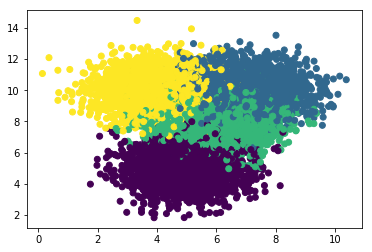

In [20]:
# The coordinates of the centers of our blobs.
centers = [[5,5], [7, 10], [6, 8],[4,10]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

KMeans
col_0    0    1    2
row_0               
0        0  272    1
1      222    0   17
2      147   53   38
3       11    4  235 


MeanShift
col_0    0    1    2
row_0               
0        1    1  271
1      215   24    0
2      179   30   29
3       13  235    2 


Spectral
col_0    0    1    2
row_0               
0        2  267    4
1        9    0  230
2       19   15  204
3      227    0   23 


Affinity
col_0  0   1   2   3   4   5   6   7   8   9  ...  21  22  23  24  25  26  27  \
row_0                                         ...                               
0       0   0  43   0   0   0   0  45   0  25 ...  52   0   0   0   0   5  23   
1       1   7   0  31  21  40   8   0   7   0 ...   0   0   5   1  24   3   0   
2       0   0   2   8   0   5  14   0  12   0 ...   1   0  37   0  17  11   4   
3      36  14   0   1   1   0  12   0   0   0 ...   0  14   6  29   1   0   1   

col_0  28  29  30  
row_0              
0       0   0  10  
1       0   0   0  
2       3  

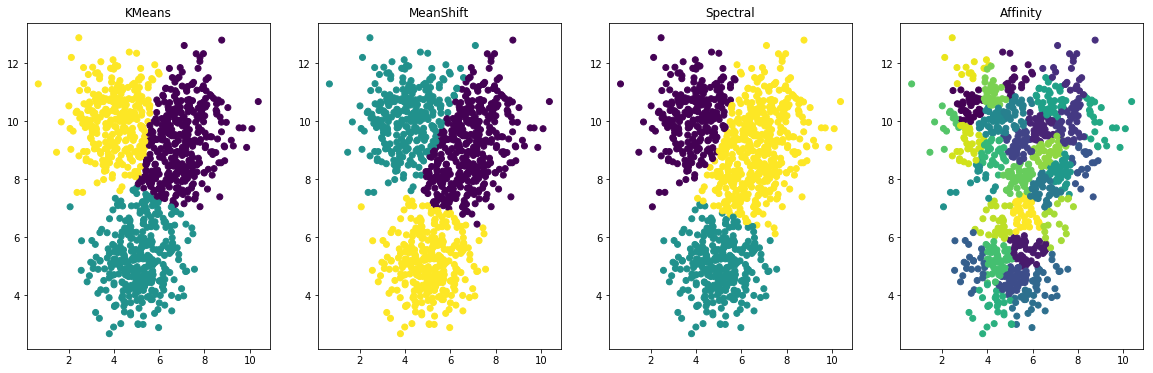

In [21]:
fig, ax = plt.subplots(1,4, figsize=(20,6))
models = []
names = []
plt_num=[]

clusters=3
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

models.append((0,'KMeans', KMeans(n_clusters=clusters, init='k-means++')))
models.append((1,'MeanShift', MeanShift(bandwidth=bandwidth, bin_seeding=True)))
models.append((2,'Spectral', SpectralClustering(n_clusters=clusters)))
models.append((3,'Affinity', AffinityPropagation()))

for plt_num, name, model in models:  
    names.append(name)
    model.fit(X_train)
    labels=model.labels_

    ax[plt_num].set_title(name)
    ax[plt_num].scatter(X_train[:, 0], X_train[:, 1], c=labels)
    print(name)
    print(pd.crosstab(y_train, labels),'\n\n')

Kmeans, Spectral and Mean Shift created 3 clusters. Affinity has many clusters like before.

----------------------

# many cluster centers that are close
There are 8 cluster centers and clusters=4 for Spectral and KMeans.

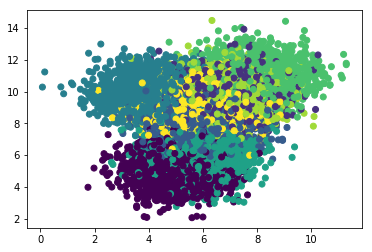

In [22]:
# The coordinates of the centers of our blobs.
centers = [[5,5], [7, 10], [6, 8],[4,10],
          [6,6], [8, 11], [7, 10],[6,9]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

KMeans
col_0    0    1   2    3
row_0                   
0      137    0   1    0
1        0   86  31   18
2       18    5  90   16
3        1    2   5  102
4       95    0  27    2
5        0  110   2    2
6        0   92  31   17
7        1   17  57   35 


MeanShift
col_0    0    1
row_0          
0        0  138
1      134    1
2       74   55
3      101    9
4        3  121
5      114    0
6      139    1
7       99   11 


Spectral
col_0    0    1    2   3
row_0                   
0        6    0  132   0
1       75   58    0   2
2      116    2    9   2
3       36    1    0  73
4       38    0   85   1
5        6  108    0   0
6       68   72    0   0
7      100    5    0   5 


Affinity
col_0  0   1   2   3   4   5   6   7   8   9  ...  24  25  26  27  28  29  30  \
row_0                                         ...                               
0      14   0   0   0   0   0   0   0   0   4 ...  22   0   0   0   0   0   0   
1       0   5   2  12   4   0  13   4  19   0 ...   0

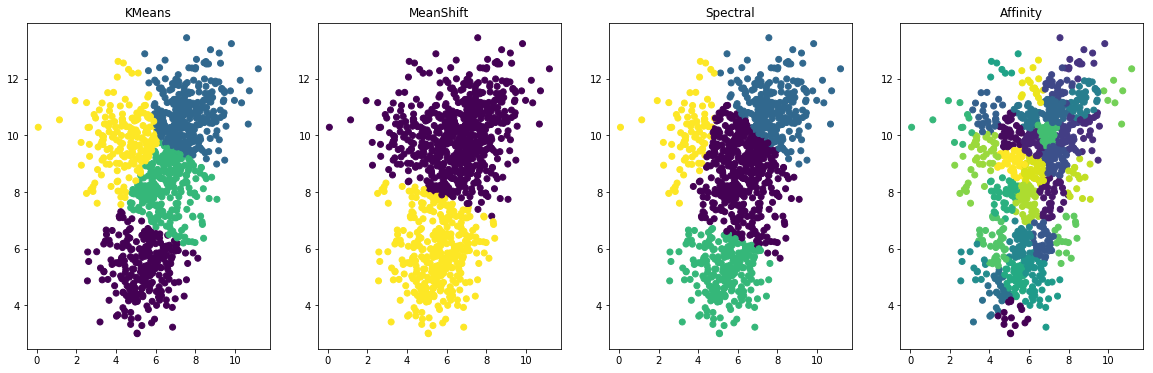

In [23]:
fig, ax = plt.subplots(1,4, figsize=(20,6))
models = []
names = []
plt_num=[]

clusters=4
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

models.append((0,'KMeans', KMeans(n_clusters=clusters, init='k-means++')))
models.append((1,'MeanShift', MeanShift(bandwidth=bandwidth, bin_seeding=True)))
models.append((2,'Spectral', SpectralClustering(n_clusters=clusters)))
models.append((3,'Affinity', AffinityPropagation()))

for plt_num, name, model in models:  
    names.append(name)
    model.fit(X_train)
    labels=model.labels_

    ax[plt_num].set_title(name)
    ax[plt_num].scatter(X_train[:, 0], X_train[:, 1], c=labels)
    print(name)
    print(pd.crosstab(y_train, labels),'\n\n')

Kmeans and Spectral have 4 clusters. Mean Shift created 2 clusters. Affinity has many clusters like before.